In [1]:
import os
#%matplotlib inline

#import matplotlib
import numpy as np
#import matplotlib.pyplot as plt
DATADIR = os.path.join(os.getcwd(),'Homework 2 Resources')
os.path.exists(DATADIR)
from numpy import random as rnd

In [2]:
fFeatures = os.path.join(DATADIR, 'X.txt')
fLabels = os.path.join(DATADIR, 'y.txt')

In [5]:
import pandas as pd
X = pd.read_csv(fFeatures,header=None)
X = np.array(X)
y = pd.read_csv(fLabels,header=None)
y = np.array(y)
np.shape(X)
X

array([[ 1.84953],
       [ 1.89349],
       [ 1.65939],
       [ 1.13482],
       [ 0.68154],
       [ 1.20309],
       [ 1.30668],
       [ 0.38246],
       [ 0.42159],
       [ 1.95597],
       [ 0.94903],
       [ 1.72711],
       [ 0.89127],
       [ 0.25564],
       [ 1.1312 ],
       [ 0.38307],
       [ 1.2162 ],
       [ 1.14898],
       [ 0.36351],
       [ 1.26137],
       [ 0.44797],
       [ 1.40307],
       [ 0.91403],
       [ 1.71289],
       [ 0.68763],
       [ 1.10041],
       [ 0.95357],
       [ 1.67709],
       [ 1.65485],
       [ 0.40076],
       [ 0.98953],
       [ 1.96683],
       [ 1.71697],
       [ 1.81731],
       [ 1.99749],
       [ 1.91317],
       [ 0.90448],
       [ 1.67562],
       [ 0.42553],
       [ 1.7955 ],
       [ 0.06809],
       [ 1.19197],
       [ 0.47886],
       [ 0.14537],
       [ 1.31603],
       [ 0.36128],
       [ 1.08909],
       [ 0.00454],
       [ 1.76331],
       [ 0.20412],
       [ 0.19153],
       [ 0.52672],
       [ 1.5

In [4]:
#X_new = np.c_[np.ones((99,1)),X]
X_b = np.c_[np.ones((100,1)),X]
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
#np.shape(X_new_b        )
#X_new
#X_b

[array([[ 0.4740113 ],
        [ 0.54068399]]), array([[ 0.88165497],
        [ 1.02632068]]), array([[ 1.2705281],
        [ 1.4883446]]), array([[ 1.64152237],
        [ 1.92788091]]), array([[ 1.99548701],
        [ 2.34600121]]), array([[ 13.96454955],
        [  6.84195152]])]

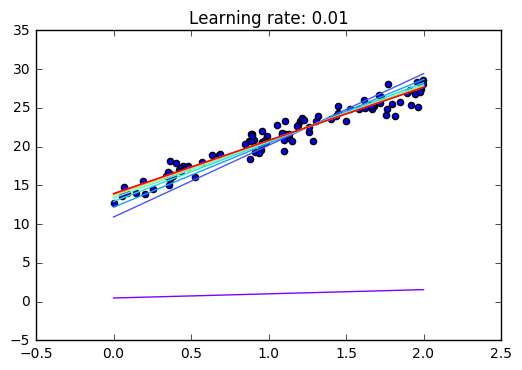

In [5]:


import matplotlib.cm as cm
def plot_grad_descent(X, y, eta, theta=rnd.randn(2,1),n_iterations=2000,graph=True):
    model_parameters = []
    m = len(X)
    X_b = np.c_[np.ones((m,1)),X]
    X_new = np.array([[0],[2]]) #used to show the hypothesis function
    X_new_b = np.c_[np.ones((2,1)),X_new]
   
    assert np.shape(X) == np.shape(y), "Features and values do not match"
    
    counter = 0
    color = iter(cm.rainbow(np.linspace(0,1,10)))
    for iteration in range(n_iterations+1):
        gradients = 2/len(X_b) * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta*gradients
        if iteration < 5 or iteration == n_iterations: 
            model_parameters.append(theta)
        if iteration % 200 == 0:
            try:
                y_predict = X_new_b.dot(theta)
                c=next(color) #use different colors
                if graph == True:
                    plt.plot(X_new, y_predict, color=c)
            except StopIteration:
                pass
        
    if graph == True:
        plt.title('Learning rate: %s'%str(eta))
        plt.scatter(X, y)
        plt.axis([-0.5,2.5,-5,35])
    return model_parameters
    
plot_grad_descent(X,y,learning_rates[1])

In [6]:
model_parameters = {}
model_parameters['learning rate 0.0001'] = plot_grad_descent(X,y,learning_rates[0],graph=False)
model_parameters['learning rate 0.01'] = plot_grad_descent(X,y,learning_rates[1],graph=False)
model_parameters['learning rate 0.5'] = plot_grad_descent(X,y,learning_rates[2],graph=False)

In [7]:
for key in model_parameters:
    print('iterations 1-5, 2000:')
    print(key, model_parameters[key],'\n')

iterations 1-5, 2000:
learning rate 0.01 [array([[ 0.4740113 ],
       [ 0.54068399]]), array([[ 0.88165497],
       [ 1.02632068]]), array([[ 1.2705281],
       [ 1.4883446]]), array([[ 1.64152237],
       [ 1.92788091]]), array([[ 1.99548701],
       [ 2.34600121]]), array([[ 13.96454955],
       [  6.84195152]])] 

iterations 1-5, 2000:
learning rate 0.5 [array([[ 21.41418129],
       [ 25.55179426]]), array([[ -6.4851635 ],
       [-10.91200857]]), array([[ 33.37591714],
       [ 38.31111235]]), array([[-20.43324812],
       [-30.54020688]]), array([[ 54.83284524],
       [ 63.63794601]]), array([[  4.25218058e+280],
       [  5.36660540e+280]])] 

iterations 1-5, 2000:
learning rate 0.0001 [array([[ 0.0509344 ],
       [ 0.03535748]]), array([[ 0.05520593],
       [ 0.04045931]]), array([[ 0.0594755 ],
       [ 0.04555866]]), array([[ 0.06374309],
       [ 0.05065553]]), array([[ 0.06800872],
       [ 0.05574993]]), array([[ 5.65474344],
       [ 6.54462991]])] 



In [8]:
#hypothesis function
theta_best = plot_grad_descent(X,y,learning_rates[1],graph=False)[-1]
#hypothesis_parameters.T.dot(X_new)
y_predict = X_new_b.dot(theta_best)
theta_best

array([[ 13.96454955],
       [  6.84195152]])

In [9]:
#come back to this
fPredict = os.path.join(DATADIR, 'predict.txt')
XPredict = np.array(pd.read_csv(fPredict,header=None))
XPredict

array([[ 1.45158],
       [ 1.15506],
       [ 2.12182],
       [ 0.48934],
       [ 0.85787]])

In [10]:
#XPredict_new = np.array(([0],[2]))
#X_new_b = np.c_[np.ones((2,1)),X_new]
XPredict_b = np.c_[np.ones((len(XPredict),1)),XPredict]
y_predict = XPredict_b.dot(theta_best)
for _ in range(len(XPredict)):
    print(XPredict[_],y_predict[_])
#plot_grad_descent(X,y,learning_rates[1])

[ 1.45158] [ 23.89618954]
[ 1.15506] [ 21.86741407]
[ 2.12182] [ 28.48193913]
[ 0.48934] [ 17.31259011]
[ 0.85787] [ 19.8340545]


### Use sklearn

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
lin_reg.intercept_, lin_reg.coef_ #thetas

(array([ 13.98918882]), array([[ 6.82242882]]))

In [14]:
for _ in range(len(X)):
    print(X[_],lin_reg.predict(XPredict)[_])

[ 1.84953] [ 23.89249005]
[ 1.89349] [ 21.86950345]
[ 1.65939] [ 28.46515474]
[ 1.13482] [ 17.32767614]
[ 0.68154] [ 19.84194583]


IndexError: index 5 is out of bounds for axis 0 with size 5